In [205]:
from useful_scit.imps import *
import check_input_01_funs
importlib.reload(check_input_01_funs)
from check_input_01_funs import *
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)

In [206]:
path = '/Volumes/mbProD/Downloads/met'

In [207]:
files = glob.glob(path+'/met*')
files.sort()

In [208]:
f = files[0]

In [209]:
xas = [xr.open_dataset(f)[['TT','LU_INDEX','XLAT_M','XLONG_M','Times']] for f in files]

In [210]:
xa = xr.concat(xas,dim='Time')
xa = xa.assign_coords(XLAT=xa.XLAT_M.isel(Time=0))
xa = xa.assign_coords(XLONG=xa.XLONG_M.isel(Time=0))

In [211]:
t1=xa.Times.to_dataframe().Times.str.decode('utf-8')
t1=pd.to_datetime(t1.values,format='%Y-%m-%d_%H:%M:%S')
xa=xa.assign_coords(Time=t1)

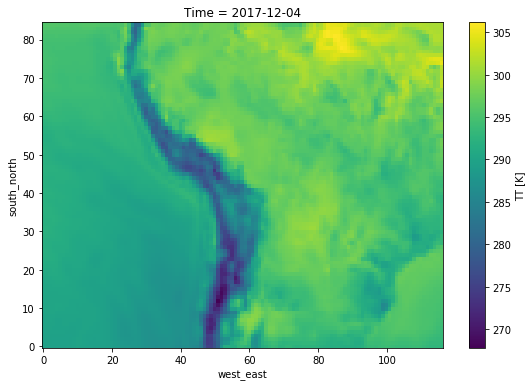

In [212]:
xa.TT.isel(num_metgrid_levels=0,Time=12).plot()

In [227]:
xa['T0']=xa.TT.isel(num_metgrid_levels=0)
p = 'T0'
p_c = 'T0_clus'
nc = 8 
xa[p_c]=get_cluster(xa,p,nc)

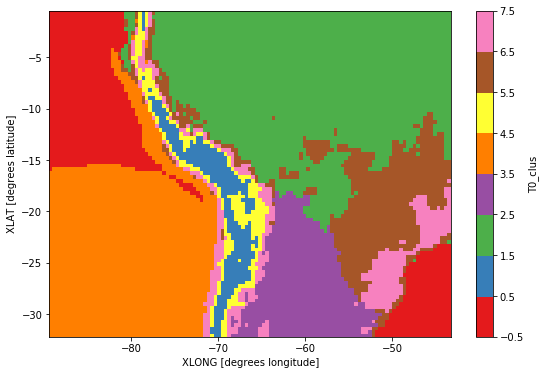

In [228]:
plot_clus(xa,p_c,nc,x='XLONG',y='XLAT')

In [240]:
x2 = xa[[p,p_c]].isel(Time=slice(1,None)).rolling(Time=4,center=True,min_periods=4).mean()

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a

(270, 310)

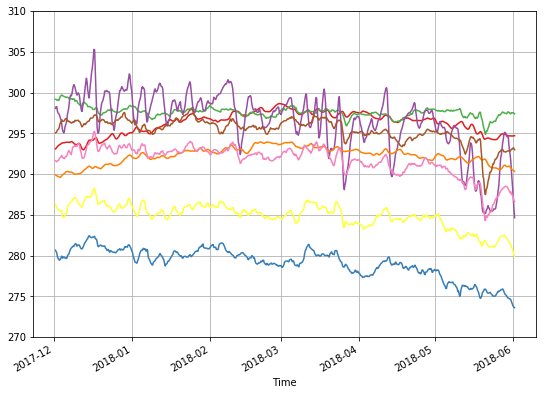

In [241]:
line_plot_clus(x2,nc,p,p_c)
ax = plt.gca()
ax.set_xlim(736655.95, 736855.05)
ax.set_ylim(270,310)

In [215]:
x1 = xa[['T0']].where(xa.LU_INDEX[0]==21).isel(Time=slice(1,None))

In [216]:
p = 'T0'
nc = 6
p_c = p+'_clus_lake'

In [217]:
 
x1[p_c]=get_cluster(x1,p,nc)

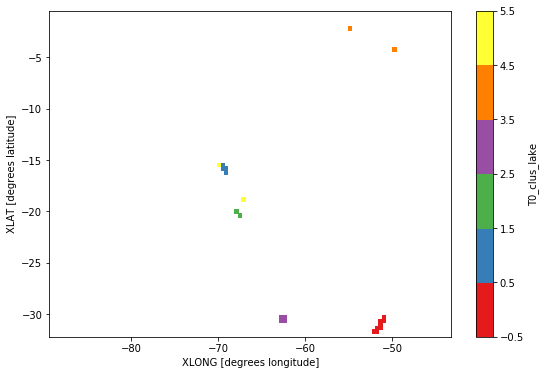

In [218]:
plot_clus(x1,p_c,nc)

(736655.95, 736855.05)

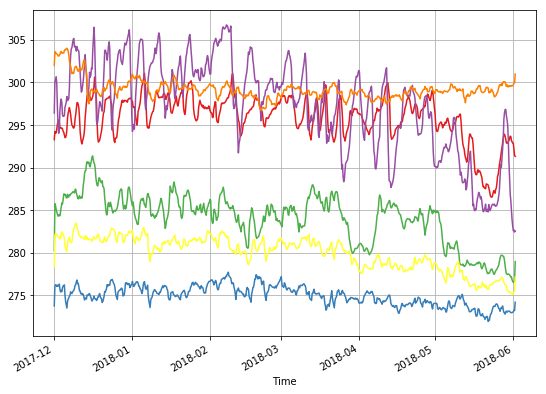

In [219]:
x2 = x1.rolling(Time=4,center=True,min_periods=1).mean()
line_plot_clus(x2,nc,p,p_c)
ax = plt.gca()
ax.set_xlim(736655.95, 736855.05)


In [220]:
ax.get_xlim()

(736655.95, 736855.05)

In [221]:
x1

<xarray.Dataset>
Dimensions:       (Time: 732, south_north: 85, west_east: 117)
Coordinates:
    XLONG         (south_north, west_east) float32 -89.19097 ... -43.409035
  * west_east     (west_east) int64 0 1 2 3 4 5 6 ... 111 112 113 114 115 116
  * south_north   (south_north) int64 0 1 2 3 4 5 6 7 ... 78 79 80 81 82 83 84
  * Time          (Time) datetime64[ns] 2017-12-01T06:00:00 ... 2018-06-02
    XLAT          (south_north, west_east) float32 -32.02111 ... -0.67884064
Data variables:
    T0            (Time, south_north, west_east) float32 nan nan nan ... nan nan
    T0_clus_lake  (south_north, west_east) float64 nan nan nan ... nan nan nan
Attributes:
    TITLE:                           OUTPUT FROM METGRID V4.0.2
    SIMULATION_START_DATE:           2017-12-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        118
    SOUTH-NORTH_GRID_DIMENSION:      86
    BOTTOM-TOP_GRID_DIMENSION:       38
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      117
    WEST-EAS